## 1. Introduction

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-dataset/car_price_prediction_with_missing.csv


In [3]:
filepath = ('/kaggle/input/car-price-prediction-dataset/car_price_prediction_with_missing.csv')

cars = pd.read_csv(filepath)

cars.head()


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,26613.92,Model X
1,2.0,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,14679.61,5 Series
2,3.0,Audi,2013.0,4.5,Electric,Manual,181601.0,New,44402.61,A4
3,4.0,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,86374.33,Model Y
4,5.0,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,73577.10,Mustang


In [4]:
cars.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,1251.243556,2011.577778,3.485467,150236.178222,52506.874391
std,725.637358,6.980468,1.427690,88150.746556,27232.417079
min,1.000000,2000.000000,1.000000,15.000000,5011.270000
25%,627.250000,2005.000000,2.300000,71178.500000,28985.052500
50%,1249.500000,2012.000000,3.450000,149762.000000,53485.240000
75%,1875.250000,2018.000000,4.700000,226299.000000,75560.340000
max,2500.000000,2023.000000,6.000000,299967.000000,99982.590000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2250 non-null   float64
 1   Brand         2250 non-null   object 
 2   Year          2250 non-null   float64
 3   Engine Size   2250 non-null   float64
 4   Fuel Type     2250 non-null   object 
 5   Transmission  2250 non-null   object 
 6   Mileage       2250 non-null   float64
 7   Condition     2250 non-null   object 
 8   Price         2250 non-null   float64
 9   Model         2250 non-null   object 
dtypes: float64(5), object(5)
memory usage: 195.4+ KB


In [6]:
cars.shape

(2500, 10)

In [7]:
print('Shape of cars dataset: ',cars.shape)
print('Duplicate count:', cars.duplicated().sum())
print('Null value count by column: \n', cars.isna().sum())
print('Total count of Null values: ', cars.isna().sum().sum())

Shape of cars dataset:  (2500, 10)
Duplicate count: 249
Null value count by column: 
 Car ID          250
Brand           250
Year            250
Engine Size     250
Fuel Type       250
Transmission    250
Mileage         250
Condition       250
Price           250
Model           250
dtype: int64
Total count of Null values:  2500


In [8]:
cars.drop_duplicates(inplace=True)
cars.dropna(inplace=True)

In [9]:
#Check for nulls
cars.isna().sum().sum()

np.int64(0)

In [10]:
print(cars.info())
print(cars.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2250 non-null   float64
 1   Brand         2250 non-null   object 
 2   Year          2250 non-null   float64
 3   Engine Size   2250 non-null   float64
 4   Fuel Type     2250 non-null   object 
 5   Transmission  2250 non-null   object 
 6   Mileage       2250 non-null   float64
 7   Condition     2250 non-null   object 
 8   Price         2250 non-null   float64
 9   Model         2250 non-null   object 
dtypes: float64(5), object(5)
memory usage: 193.4+ KB
None
(2250, 10)


## 2. Exploratory Data Analysis

In [11]:
cars['Price'].describe()

count     2250.000000
mean     52506.874391
std      27232.417079
min       5011.270000
25%      28985.052500
50%      53485.240000
75%      75560.340000
max      99982.590000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

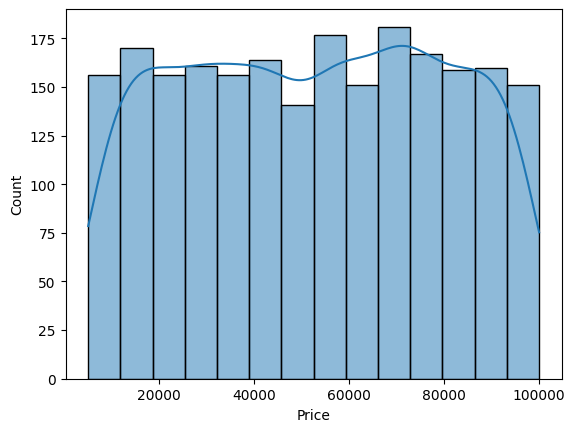

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(cars['Price'], kde=True)


Graph shows inf values. Removing them and replace with Nan, then dropping

In [15]:
cars['Price'] = cars['Price'].replace([np.inf, -np.inf], np.nan)
cars.dropna(inplace=True)

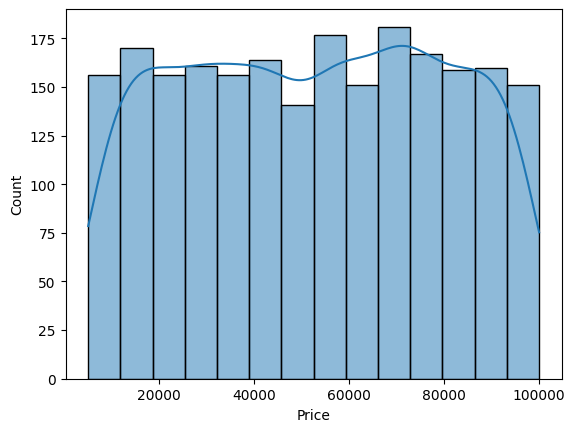

In [16]:
sns.histplot(cars['Price'], kde=True)
plt.show()

In [17]:
for cols in cars.columns:
    if cars[cols].dtype == 'object':
        print(cols)

Brand
Fuel Type
Transmission
Condition
Model


<Axes: xlabel='Mileage', ylabel='Price'>

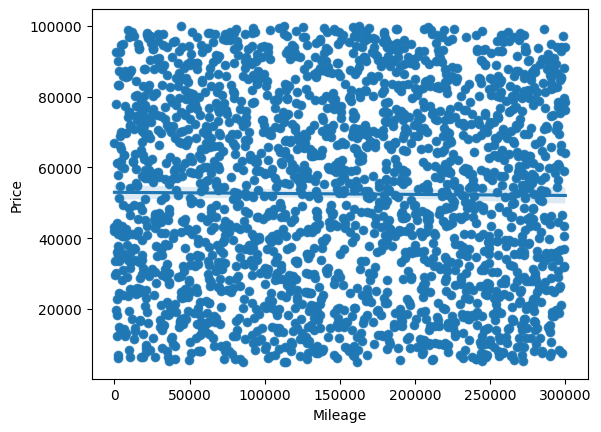

In [18]:
sns.scatterplot(x=cars['Mileage'], y=cars['Price'])
sns.regplot(x=cars['Mileage'], y=cars['Price'])

Mileage and Price show a near 0 correlation meaning in this dataset, meaning there is almost no relationship to these two features 

In [19]:
cars[['Mileage', 'Price']].describe()

,Mileage,Price
count,2250.000000,2250.000000
mean,150236.178222,52506.874391
std,88150.746556,27232.417079
min,15.000000,5011.270000
25%,71178.500000,28985.052500
50%,149762.000000,53485.240000
75%,226299.000000,75560.340000
max,299967.000000,99982.590000


In [20]:
cars.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price          1.000000
Car ID         0.006645
Mileage       -0.009638
Engine Size   -0.013270
Year          -0.035127
Name: Price, dtype: float64